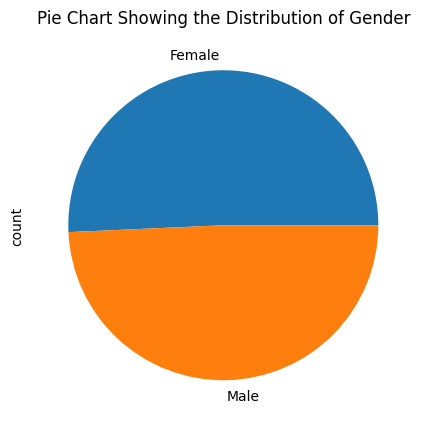

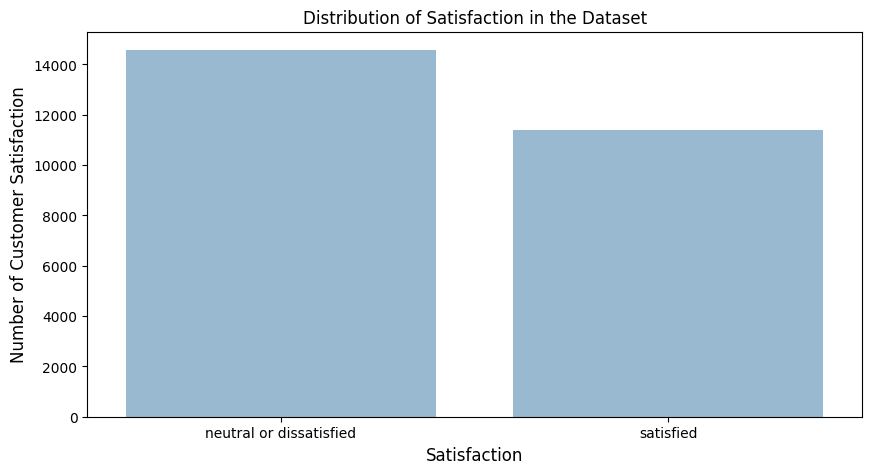

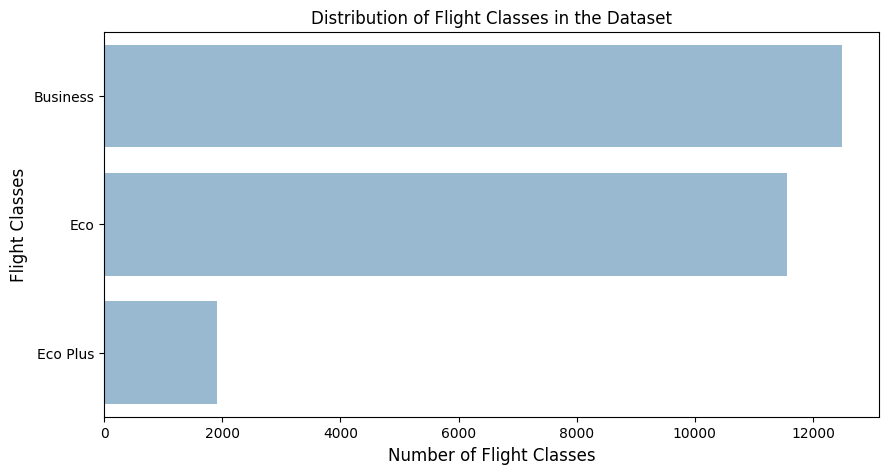

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
       Age  Flight Distance  Inflight wifi service  \
0       52              160         

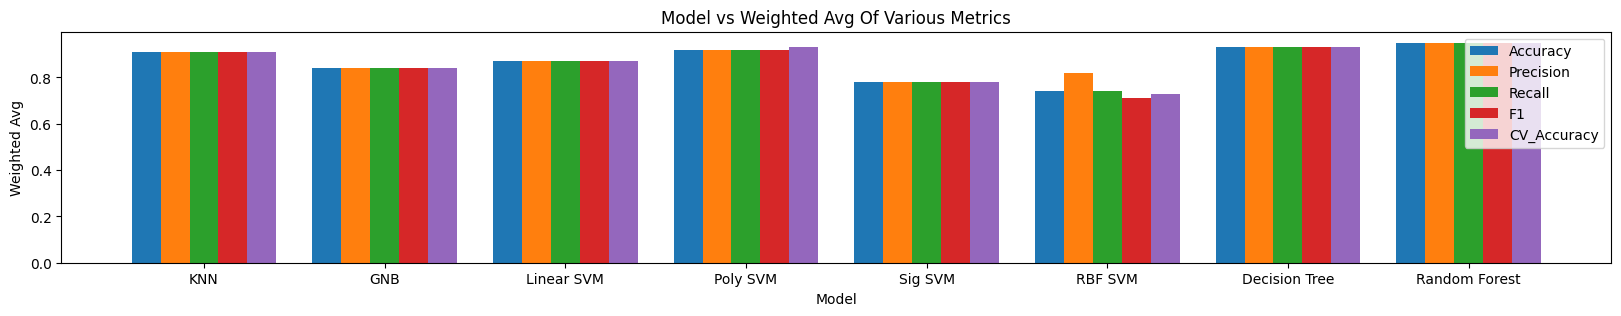

In [ ]:
#04/18/2024
#CIS 3120 Project 2 Question 1: Airline Passenger Satisfaction Classification Model


#Importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle

#The function below will take the arguement of airline passengar satisfaction dataframe and the column name that we want encoded and make it permanent.
def encoding(df,column_name):
    #Using a for loop if we have mulitple column names.
    for column in column_name:
        encoded_column = pd.get_dummies(df[column], dtype='int') #Use the pd.getdummies method to convert categorical variables into a set of binary columns (0 or 1) to represent the presence or absence of a category. dtype means make the 0 and 1 into integer.
        df.drop(column, axis=1, inplace=True) #Dropping the column from the orginal dataframe and use inplace=True to make it permanent.
        df = df.join(encoded_column) #Merge the orginal dataframe with the encoded version
    return df #Return the new dataframe with the encoded values.

#The function below would take the parameter df, column name, and pie chart name and output it using matplotlib.
def make_pie_chart(df, column_name, pie_chart_name):
    count = df[column_name].value_counts() #Getting the value count of that column
    plt.figure(figsize=(5,10)) #Size of the figure
    count.plot.pie( title = pie_chart_name) #Makeing the chart and giving it the pie_chart_name title
    plt.show() #Showing the graph

#The function below would take in the parameter df, column_name, barplot_title_name, ylabel, xlabel to find the
#different values of that columns and how many airline passengar satisfaction would have that value and output it as a barplot.
def barplot(df, column_name, barplot_title_name, ylabel, xlabel):
    count  = df[column_name].value_counts() #Value_counts() would get all the different values of that column and how many are there
    plt.figure(figsize=(10,5)) #Size of the graph
    sns.barplot(x = count.index, y= count.values,  alpha=0.5) #.values get counts of unique values on the y-axis and .index get the unique values themselves on the x-axis.
    plt.title(barplot_title_name) #The barplot's graph name
    plt.ylabel(ylabel, fontsize=12) #The y-axis name and the font size
    plt.xlabel(xlabel, fontsize=12) #The x-axis name and the font size
    plt.show() #Showing the graph

#The function below would take in the parameter df, column_name, barplot_title_name, ylabel, xlabel to find the
#different values of that columns and how many airline passengar satisfaction would have that value and output it as a horizontal barplot.
def hbarplot(df, column_name, barplot_title_name, ylabel, xlabel):
    count  = df[column_name].value_counts() #Value_counts() would get all the different values of that column and how many are there
    plt.figure(figsize=(10,5)) #Size of the graph
    sns.barplot(x = count.values, y= count.index,  alpha=0.5, orient='h') #.values get counts of unique values on the x-axis and .index get the unique values themselves on the y-axis. Switched because the plot is horizontal.
    plt.title(barplot_title_name) #The barplot's graph name
    plt.ylabel(ylabel, fontsize=12) #The y-axis name and the font size
    plt.xlabel(xlabel, fontsize=12) #The x-axis name and the font size
    plt.show() #Showing the graph

#The function below would take the arguement of our dataset that we splitted into features (x) and target (y) and train a classification model which
#will output the Average accuracy, Cross validation accuracy, and the classification report of the different models (KNN, decision tree, random forest, SVMs, and Naive Bayes) we will be training our dataset with, and Exporting the model as a pickle
def classification_analysis(X, y):
    #The code below would be splitting the dataset into training and test sets in the ratio 70/30
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

    #standardizing our dataset which means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #Fitting (Training) the models to the training dataset
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    from sklearn import svm
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression

    #Note: here we are calling our KNN model knn. This is your choice.
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train.ravel())

    #We are using a Gaussian distribution for the Naive Bayes classifier hence we chose the GaussianNB model.
    #For a list of other distributions, see here: https://scikit-learn.org/stable/modules/naive_bayes.html
    gnb = GaussianNB()
    gnb.fit(X_train, y_train.ravel())

    #Below we are experimenting with various SVMs and different parameters
    linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
    rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
    poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
    sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())

    #Training a decision tree classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    #Training the Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
    rf.fit(X_train,y_train.ravel())

    #Training rounds for our data
    k = 5
    kf = KFold(n_splits=k)

    #Performing 5-Fold Cross Validation for KNN
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    knn_result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using KNN:{knn_result.mean()}')

    #Performing 5-Fold Cross Validation for GNB
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    GNB_result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using GNB:{GNB_result.mean()}')

    #Performing 5-fold Cross Validation on a Linear SVM
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    Linear_SVM_result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using Linear SVM:{Linear_SVM_result.mean()}')

    #Performing 5 Fold Cross Validation on a RBF SVM
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    RBF_SVM_result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using RBF SVM:{RBF_SVM_result.mean()}')

    #Performing 5 fold Cross Validation on Poly SVM
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    Poly_SVM_result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using Poly SVM:{Poly_SVM_result.mean()}')

    #Performing 5 Fold Cross Validation on Sigmoid SVM
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    Sigmoid_SVM_result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using Sigmoid SVM:{Sigmoid_SVM_result.mean()}')

    #Performing 5-Fold Cross Validation for decision tree
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    dt_result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using Decision Tree:{dt_result.mean()}')

    #Performing 5-Fold Cross Validation for Random Forest
    #for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
    rf_result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
    print(f'Avg accuracy using Random Forest:{rf_result.mean()}')

    #KNN - Using the model to make predictions on the test dataset
    # Predicting the Test set results
    y_pred_knn = knn.predict(X_test)

    #GNB - Using the model to make predictions on the test dataset
    # Predicting the Test set results
    y_pred_gnb = gnb.predict(X_test)

    #KNN - Classification Report
    from sklearn.metrics import classification_report
    print("\nKNN Classification Report:\n")
    print(classification_report(y_test, y_pred_knn))

    #GNB - Classification Report
    #Note - no need to import the classification_report libary again as it was done in the cell above
    print("GNB Classification Report:\n")
    print(classification_report(y_test, y_pred_gnb))

    #Linear SVM Classification Report
    svm_linear_pred = linear.predict(X_test)
    print("Linear SVM Classification Report:\n")
    print(classification_report(y_test, svm_linear_pred))

    #Poly SVM Classification Report
    svm_poly_pred = poly.predict(X_test)
    print("Poly SVM Classification Report:\n")
    print(classification_report(y_test, svm_poly_pred))

    #Sig SVM Classification Report
    svm_sig_pred = sig.predict(X_test)
    print("Sig SVM Classification Report:\n")
    print(classification_report(y_test, svm_sig_pred))

    #RBF SVM Classification Report
    svm_rbf_pred = rbf.predict(X_test)
    print("RBF SVM Classification Report:\n")
    print(classification_report(y_test, svm_rbf_pred))

    #Decision Tree - Generating Classification Report
    #Note - we set what the target names are
    #Decision Tree - Making Predictions
    y_pred_dt = dt.predict(X_test)
    print("Decision Tree Classification Report:\n")
    print(classification_report(y_test, y_pred_dt, target_names = ['neutral or dissatisfied', 'satisfied']))

    #Random Forest - Making Predictions and Generating Classification Report
    y_pred_rf = rf.predict(X_test)
    print("Random Forest Classification Report:\n")
    print(classification_report(y_test, y_pred_rf))

    # Save the trained model and the scaler as pickle files
    with open('poly_svm_model.pk1', 'wb') as f:
        pickle.dump(poly, f)
    with open('airline_classification_scaler.pk1', 'wb') as f:
        pickle.dump(sc, f)

#The function below would take the arguments of our 5 fold validation tests and plot the accuracy and weighted avg for precision, recall, and f1 scores for each on a single graph.
def Classification_Metrics_Graph(Models, accuracy, precision, recall, f1, CV_Accuracy):
    # Number of bars
    n_bars = len(Models)

    # Number of groups of bars (accuracy, precision, recall, f1, CV_Accuracy)
    n_groups = 5

    # Total width for each group of bars
    total_width = 0.8

    # Width for each individual bar within a group
    bar_width = total_width / n_groups

    # Calculate the center positions for each group of bars
    X_axis = np.arange(len(Models))

    # Calculate the left positions for each individual bar within a group
    left_positions = X_axis - (total_width - bar_width) / 2

    # Setting the size of the graph
    plt.rcParams["figure.figsize"] = (20, 3)

    # Plotting the bars for each metric using the left positions and respective data
    plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
    plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
    plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
    plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')
    plt.bar(left_positions + bar_width * 4, CV_Accuracy, bar_width, label='CV_Accuracy')

    # Setting the range of values for the X axis and labels
    plt.xticks(X_axis, Models)
    plt.xlabel("Model")
    plt.ylabel("Weighted Avg")
    plt.title("Model vs Weighted Avg Of Various Metrics")
    plt.legend(loc='upper right')

    plt.show()

#The main function will act as as a way to call our functions.
def main():
    #Making a panda dataframe from the csv file of the datasets that we will be using to train our model. There was a bigger data sample, but due to computation power and timing, I selected the smaller data sample.
    airline_passenger_satisfaction_df = pd.read_csv('https://raw.githubusercontent.com/alvliu03/Airline_Passenger_Satisfaction_Classification/main/Airline_Passenger.csv')

    #print(airline_passenger_satisfaction_df)

    #Dropping the extra index and id columns of the dataframe because it is not relevant to our classification model.
    airline_passenger_satisfaction_df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

    make_pie_chart(airline_passenger_satisfaction_df, 'Gender', 'Pie Chart Showing the Distribution of Gender')

    barplot(airline_passenger_satisfaction_df, 'satisfaction', 'Distribution of Satisfaction in the Dataset', 'Number of Customer Satisfaction', 'Satisfaction')

    hbarplot(airline_passenger_satisfaction_df, 'Class', 'Distribution of Flight Classes in the Dataset', 'Flight Classes', 'Number of Flight Classes')

    # print(airline_passenger_satisfaction_df)
    # print(airline_passenger_satisfaction_df.columns)
    # airline_passenger_satisfaction_df.info()
    # print(airline_passenger_satisfaction_df.isnull().sum())
    #print(airline_passenger_satisfaction_df['Class'].value_counts())

    #Had 310 null values for flight delays, so we decided to get the average flight delay and replaced the null values
    #with them and rounding it to the ones place.
    average_flight_delays = round(airline_passenger_satisfaction_df['Arrival Delay in Minutes'].mean())
    airline_passenger_satisfaction_df['Arrival Delay in Minutes'] = airline_passenger_satisfaction_df['Arrival Delay in Minutes'].fillna(value=average_flight_delays)

    print(airline_passenger_satisfaction_df.isnull().sum())

    Need_encoding = ['Gender', 'Customer Type', 'Type of Travel', 'Class'] #Encoding the categorial datas because our model works better with numbers than strings. Maybe Satisfaction (What we are looking for) too?
    airline_passenger_satisfaction_df = encoding(airline_passenger_satisfaction_df, Need_encoding)

    print(airline_passenger_satisfaction_df)
    # print(airline_passenger_satisfaction_df.columns)
    # airline_passenger_satisfaction_df.info()
    print(airline_passenger_satisfaction_df.isnull().sum())

    #.values is used to extract the dataframe values to a numpy array
    columns_for_x = [col for col in airline_passenger_satisfaction_df.columns if col != 'satisfaction'] #Getting all the columns in our dataframe except for the dependent variable which is satisfaction. Found in Chatgpt.
    x = airline_passenger_satisfaction_df[columns_for_x].values #Getting all the independent vairables for our model.
    y = airline_passenger_satisfaction_df['satisfaction'].values #Getting all the dependent variables for our model.

    #print(x, y)

    #Training our model and outputting the SVM(Support Vector Machine), NAIVE_BAYES, KNN(K-Nearest Neighbors), Decision Tree, and Random Forest of our dataset.
    classification_analysis(x, y)

    #List of the names of the models that we trained, their accuracy, and their respective weighted average precision, recall, and f1.
    Models = ['KNN', 'GNB', 'Linear SVM', 'Poly SVM', 'Sig SVM', 'RBF SVM', 'Decision Tree', 'Random Forest']
    accuracy = [0.91, 0.84, 0.87, 0.92, 0.78, 0.74, 0.93, 0.95]
    precision = [0.91, 0.84, 0.87, 0.92, 0.78, 0.82, 0.93, 0.95]
    recall = [0.91, 0.84, 0.87, 0.92, 0.78, 0.74, 0.93, 0.95]
    f1 = [0.91, 0.84, 0.87, 0.92, 0.78, 0.71, 0.93, 0.95]
    CV_Accuracy = [0.91, 0.84, 0.87, 0.93, 0.78, 0.73, 0.93, 0.95]

    Classification_Metrics_Graph(Models, accuracy, precision, recall, f1, CV_Accuracy)

main()